In [1]:
import numpy as np
import struct

In [10]:
file_path = "./storage/32C7981_save_peaks.dat"
sample_size = 8
with open(file_path, 'rb') as f:
    # Read the binary data
    binary_data = f.read()

num_samples = len(binary_data) // sample_size


In [11]:
# Unpack the binary data into complex numbers
samples = []
for i in range(num_samples):
    # Extract real and imaginary parts from the binary data
    real_part, imag_part = struct.unpack('ff', binary_data[i * sample_size: (i + 1) * sample_size])
    # Create a complex number and append it to the list of samples
    samples.append(complex(real_part, imag_part))

In [12]:
samples = np.array(samples)
samples.shape

(2516,)

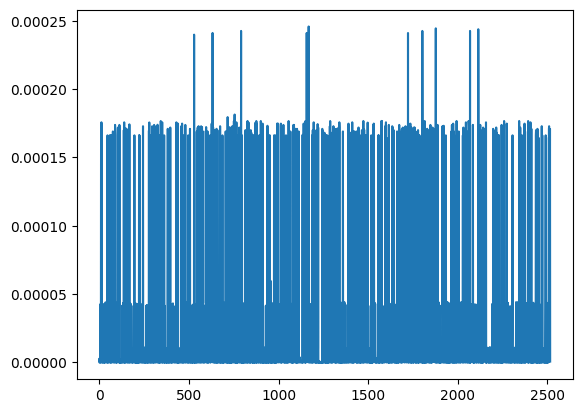

In [13]:
from matplotlib import pyplot as plt
plt.plot(np.abs(samples))

In [8]:
N = 257
M = 31
R = 5
zfc_seq = np.array([np.exp(-1j * np.pi * M * n * (n + 1) / N) for n in range(N)])
zfc_seq_rep = np.tile(zfc_seq, R)
print(zfc_seq.shape)
print(zfc_seq_rep.shape)

(257,)
(1285,)


In [9]:
corr_zfc = np.correlate(samples, zfc_seq, mode='valid')
corr_zfc_rep = np.correlate(samples, zfc_seq_rep, mode='valid')

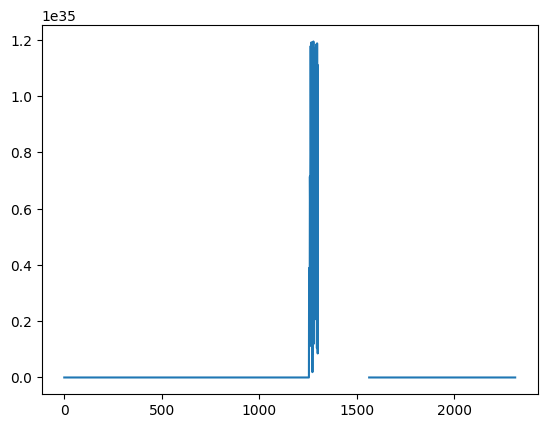

In [10]:
plt.plot(np.abs(corr_zfc))

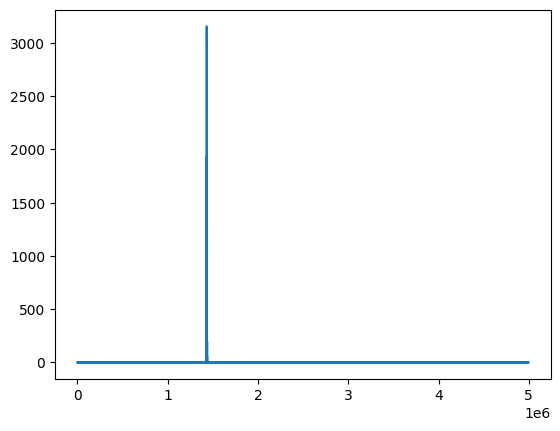

In [133]:
plt.plot(np.abs(corr_zfc_rep))

[3404560 3404817 3405074]
3404260 3405374


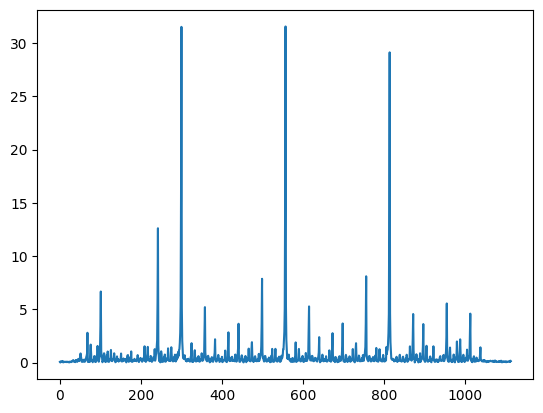

In [103]:
data = np.abs(corr_zfc)
peaks = np.squeeze(np.argwhere(data > 0.9*np.max(data)))
print(peaks)
p_min, p_max = np.min(peaks)-300, np.max(peaks) + 300
print(p_min, p_max)
plt.plot(data[p_min : p_max])

3590377
3580377 3595377


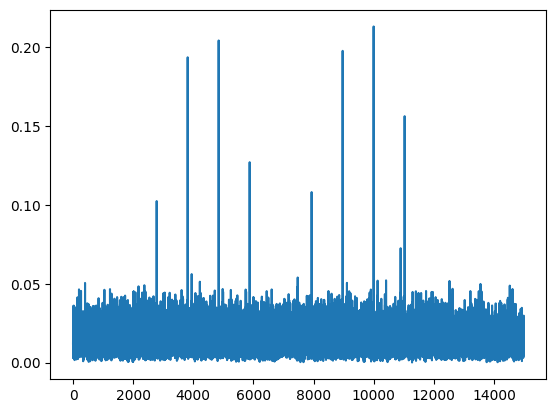

In [76]:
data = np.abs(corr_zfc_rep)
peak = np.squeeze(np.argmax(data))
print(peak)
p_min, p_max = peak-10000, peak + 5000
print(p_min, p_max)
plt.plot(data[p_min : p_max])

In [73]:
corr_abs = np.abs(corr_zfc)
max_val = np.max(corr_abs)
peaks = np.argwhere(corr_abs > max_val*0.8)
print(peaks.shape)
print(peaks[-1])

(10, 1)
[3530930]


In [93]:
np.mean(np.abs(corr_zfc)[int(2.4e6):])

0.03642388769000378

In [94]:
np.max(np.abs(corr_zfc))

8.658554439552674

In [95]:
np.max(np.abs(corr_zfc))/np.mean(np.abs(corr_zfc)[int(2.4e6):])

237.7163721029411

In [74]:
np.mean(np.abs(corr_zfc))

0.036543072796942445